# Implementation of Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Recall that linear regression has the form: **h(x) ≈ y = b0 + b1 * x**

## Simple Linear Regression

In [2]:
def simple_linear_regression(X_train, y_train, X_test):
    pred = [];
    b0, b1 = compute_coeff(X_train, y_train)
    for t in X_test:
        y_delta = b0 + b1 * t
        pred.append(y_delta)
    return pred
    
def compute_coeff(X_train, y_train):
    x_mean = np.mean(X_train)
    y_mean = np.mean(X_train)
    b1 = np.cov(X_train, y_train)[0, 1] / np.var(X_train)
    b0 = y_mean - b1 * x_mean
    return b0, b1

def RMSE(y_actual, y_pred):
    error = 0
    for i in range(len(y_pred)):
        error += np.square(y_pred[i] - y_actual[i])
    mean_error = error / len(y_actual)
    return np.sqrt(mean_error)

### Testing using data from https://www.kaggle.com/c/house-prices-advanced-regression-techniques

I will only be using the variables LotArea and SalePrice for simple linear regression.

Also, I will be using sklearn's prebuilt train_test_split to partition training and testing.

   LotArea  SalePrice
0     8450     208500
1     9600     181500
2    11250     223500
3     9550     140000
4    14260     250000 

RMSE: 189792.17011070307
[6335.74766000534, 13686.491591464954, 7380.387479520421, -196.12110157798088, 14914.80434627939, -6909.749538717953, 20199.227755621258, -5400.1876017263785, -6058.348953215735, 21741.31510823876, 2275.8104859925097, 9098.494728466474, 24676.25555354304, 9697.345027932082, 5664.193490317073, 7309.5968690404625, 6010.4935037460655, 3630.3983838252534, 6046.8454388573955, 10642.495340826681, 15349.114307872656, 7456.917869228488, 6754.751543656996, 1464.588355087024, 7489.443284854417, 5337.026074315096, 7263.678635215623, 26853.545140737482, 10975.402536056761, -1669.3311034582248, 4468.406151128562, 10565.964951118614, 24733.653345824085, 6452.456504310139, 16068.499971128465, 7839.56981776881, 4013.0503323655776, 5926.310075067195, 18058.290103538147, 14539.805436709874, 2176.3209793720252, 7227.326700104295, 8907.168754196315,

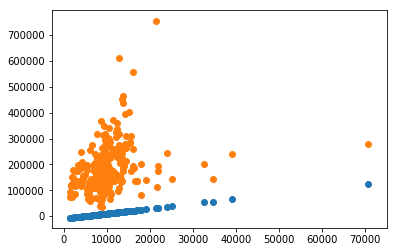

In [3]:
def run_simple_linear_regression():
    # import data keeping only LotArea and SalePrice
    df = pd.read_csv("data.csv")
    df = df[['LotArea','SalePrice']]
    print(df.head(), "\n")
    
    X = list(df['LotArea'])
    y = list(df['SalePrice'])
    
    # partition data and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    y_pred = simple_linear_regression(X_train, y_train, X_test)
    
    # evaluate
    rmse = RMSE(y_test, y_pred)
    print("RMSE:", rmse)
    
    print(y_pred)
    
    ax = plt.scatter(X_test, y_pred)
    ax2 = plt.scatter(X_test, y_test)
    
run_simple_linear_regression()

## Multivariate linear Regression

most commonly used form of linear regression used to model the relationship between one dependent variable and multiple independent variables

has the form: **h(w) = y = E(y|x) = w0 + (w1)(X1) + (w2)(X2) + ... (wn)(Xn)**

Cost Function has the form: **J(w0, w1, ..., wn) = (1/2m) * ∑(i->m) (h(wi)-yi)^2**, where m is the number of instances

In [5]:
# want to use gradient descent
def multivar_linear_regression(X_train, y_train, learning_rate=0.0001, epochs=1000):
    theta = np.random.uniform(low=0.0, high=0.0, size=(len(X_train[0]), 1))
    for i in range(0, epochs):
        theta = gradient_descent(X_train, y_train, theta, learning_rate)
        print(theta)
    return theta

def hypothesis(X_instance, theta):
    # h_theta(x) = transpose(theta) * X
    # X_instance is a 1xn matrix of features
    # theta is a 1xn matrix of weights
    #X_instance = np.reshape(len(X_instance), 1)
    return np.dot(np.transpose(theta), X_instance)
        
def gradient_descent(X_train, y_train, theta, learn_rate):
    theta_ = []
    for j in range(0, len(X_train[0])):
        theta_.append(theta[j] - learn_rate * step(X_train, y_train, theta, j))
        #print(step(X_train, y_train, theta, j))
    return theta_

# this is the partial derivative of the cost function with respect to jth element of theta    
def step(X_train, y_train, theta, j):
    res = 0
    for i in range (0, len(X_train)):
        #print("X_train[i]", X_train[i])
        #print("y_train[i]", y_train[i])
        #print("X_train.item", X_train.item(i, j))
        #print("hypo", hypothesis(X_train[i], theta))
        #print("actual", y_train[i])
        #print((hypothesis(X_train[i], theta) - y_train[i]))
        res += (hypothesis(X_train[i, :], theta) - y_train[i]) * X_train.item(i,j)
        #print("res", res)
    #print(res/len(X_train))
    return (res/len(X_train))

# TODO there is a change it is not working because the data is not normalized
def normalize(df, col):
    raise NotImplementedError

def cost_function(X_train, y_train, theta):
    sum_of_squared_diff = 0
    for i in range(0, len(X_train)):
        sum_of_squared_diff += (hypothesis(X_train[i, :], theta) - y_train[i]) ** 2
    return (1/2 * len(X)) * sum_of_squared_diff
    

In [ ]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split

class Multivariable_Linear_Regression():

    def __init__(self, df, target_feature, test_size=0.2, learning_rate=0.001):
        self.test_size = test_size
        self.df = df
        self.target_feature = target_feature
        self.theta = np.zeros((len(df.columns, 1)), dtype=np.float32)
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.lr = learning_rate
        
    def split_train_test(self):
        y = self.df.as_matrix(columns=[target_feature])
        X = self.df.drop(target_feature, axis=1).as_matrix()
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=self.test_size, random_state=42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def predict(self, x):
        return np.dot(np.transpose(self.theta), x)
    
    def cost_function(self):
        preds = predict(self.X_train)
        error = (preds - y_train) ** 2
        return error.sum() / len(X_train)
        
    def gradient_descent(self):
        raise NotImplementedError
        
    def normalize(self):
        raise NotImplementedError

    def train(self):
        raise NotImplementedError
        
        

In [6]:
def run_multivar_linear_regression():
    df = pd.read_csv("data.csv")
    df.drop(['Id'], axis=1, inplace=True)
    #df = df[['LotArea', 'YearBuilt', 'GarageArea', 'YrSold', 'SalePrice']]
    df = df[['LotArea', 'GarageArea', 'SalePrice']]
    df = df.dropna()
    
    print(df.head(), "\n")
    
    y = df.as_matrix(columns=['SalePrice'])
    print(y.shape)
    X = df.drop('SalePrice', axis=1).as_matrix()
    print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #theta = multivar_linear_regression(X_train, y_train)
    #print(theta)
    
run_multivar_linear_regression()

   LotArea  GarageArea  SalePrice
0     8450         548     208500
1     9600         460     181500
2    11250         608     223500
3     9550         642     140000
4    14260         836     250000 

(1460, 1)
(1460, 2)
